# Housing Data

- Reading data
- See Null Values and data types
- droping usless columns
- converting (object) columns to (category)
- Data visualaisation
- Encoding category data
- Check for outliers
- Scaling data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.describe(include=['object'])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [6]:
object_cols = df.select_dtypes("object").columns
object_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
df[object_cols] = df[object_cols].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


In [9]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
df.corr()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_11124\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


C:\Users\mahmo\AppData\Local\Temp\ipykernel_11124\379417841.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True)


<Axes: >

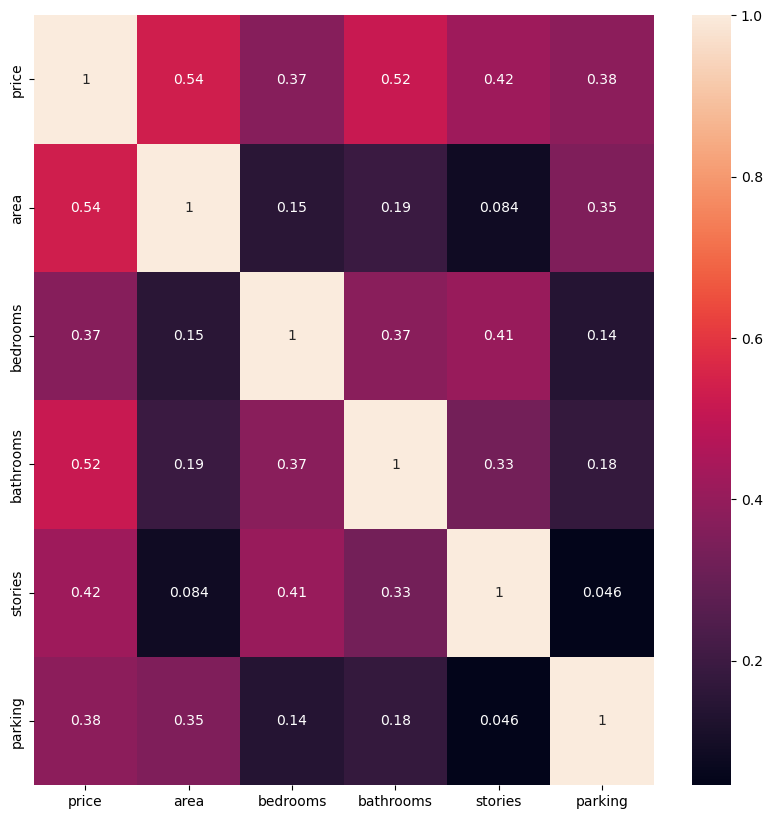

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot=True)

In [12]:
df.drop(columns=["hotwaterheating" , "stories"] ,axis=1 , inplace=True)
df

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,yes,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,yes,no,no,yes,3,no,furnished
2,12250000,9960,3,2,yes,no,yes,no,2,yes,semi-furnished
3,12215000,7500,4,2,yes,no,yes,yes,3,yes,furnished
4,11410000,7420,4,1,yes,yes,yes,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,yes,no,yes,no,2,no,unfurnished
541,1767150,2400,3,1,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,yes,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,no,no,no,no,0,no,furnished


In [13]:
df["total_rooms"] = df["bedrooms"] + df["bathrooms"]
df

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,total_rooms
0,13300000,7420,4,2,yes,no,no,yes,2,yes,furnished,6
1,12250000,8960,4,4,yes,no,no,yes,3,no,furnished,8
2,12250000,9960,3,2,yes,no,yes,no,2,yes,semi-furnished,5
3,12215000,7500,4,2,yes,no,yes,yes,3,yes,furnished,6
4,11410000,7420,4,1,yes,yes,yes,yes,2,no,furnished,5
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,yes,no,yes,no,2,no,unfurnished,3
541,1767150,2400,3,1,no,no,no,no,0,no,semi-furnished,4
542,1750000,3620,2,1,yes,no,no,no,0,no,unfurnished,3
543,1750000,2910,3,1,no,no,no,no,0,no,furnished,4


# data visulaisation

C:\Users\mahmo\AppData\Local\Temp\ipykernel_11124\1150832963.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True)


<Axes: >

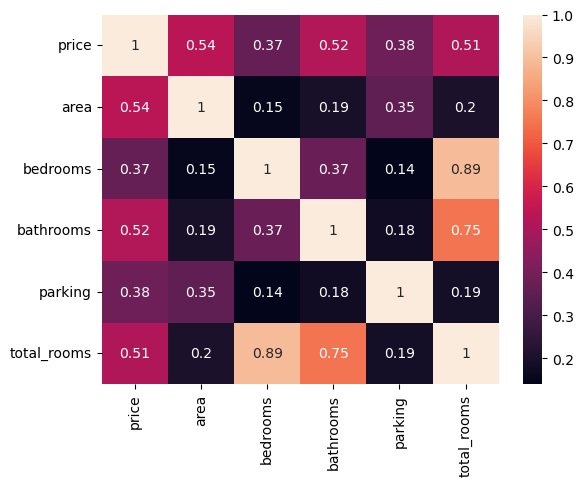

In [14]:
sns.heatmap(df.corr() , annot=True)

In [15]:
storys_d = df.pivot_table(index="total_rooms" , columns="prefarea" , values="price" , aggfunc=len).replace(np.NaN, 0)
storys_d

prefarea,no,yes
total_rooms,,
2,2.0,0.0
3,113.0,15.0
4,165.0,67.0
5,89.0,25.0
6,36.0,20.0
7,8.0,1.0
8,4.0,0.0


C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='prefarea', ylabel='count'>

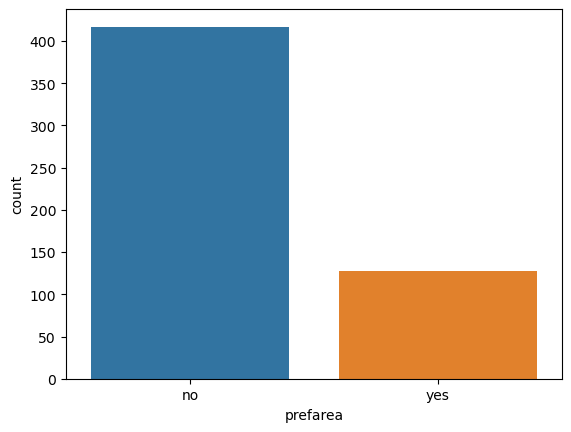

In [16]:
sns.countplot("prefarea" , data=df)

In [17]:
numeric_cols = df.select_dtypes("number")


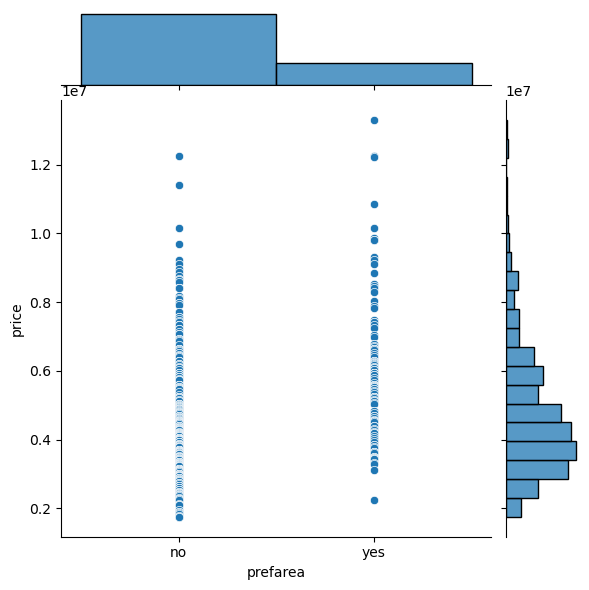

In [18]:
sns.jointplot(x ="prefarea" , y="price" , data=df)

In [19]:
category_cols = df.select_dtypes("category").columns
category_cols

Index(['mainroad', 'guestroom', 'basement', 'airconditioning', 'prefarea',
       'furnishingstatus'],
      dtype='object')

C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='furnishingstatus', ylabel='count'>

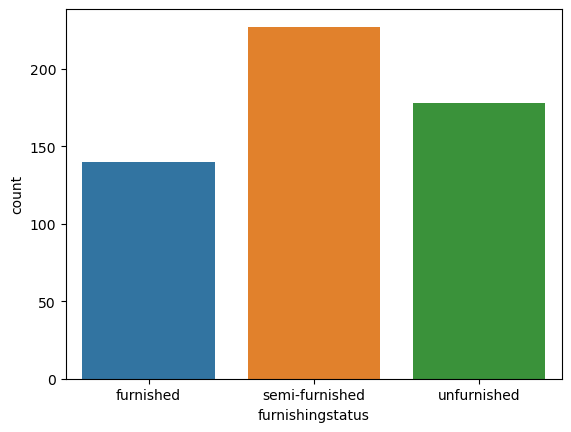

In [20]:
sns.countplot(df["furnishingstatus"])

C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='airconditioning', ylabel='count'>

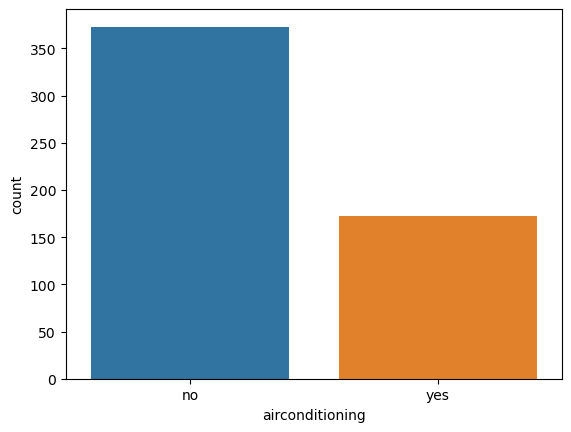

In [21]:
sns.countplot(df["airconditioning"])

C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='basement', ylabel='count'>

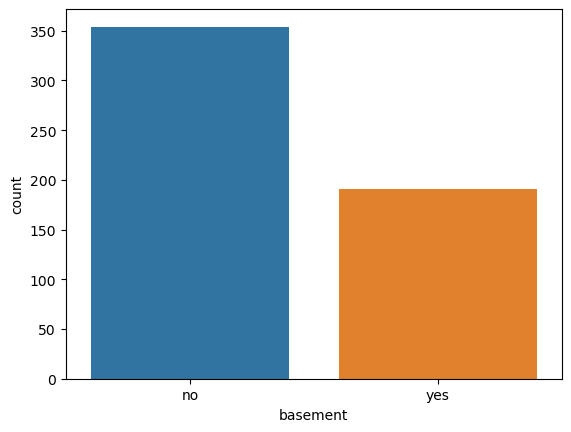

In [22]:
sns.countplot(df["basement"])

<Axes: xlabel='price', ylabel='total_rooms'>

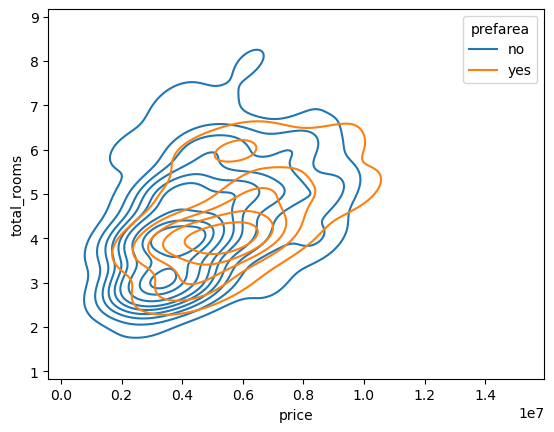

In [23]:
sns.kdeplot(x="price" ,y="total_rooms" , data=df , hue="prefarea")

<Axes: xlabel='price', ylabel='total_rooms'>

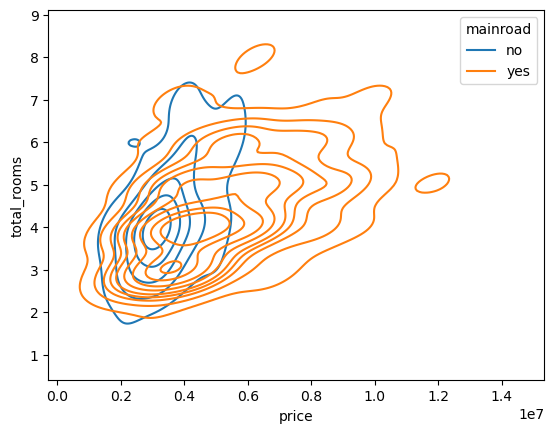

In [24]:
sns.kdeplot(x="price" ,y="total_rooms" , data=df , hue="mainroad")

<Axes: xlabel='total_rooms', ylabel='price'>

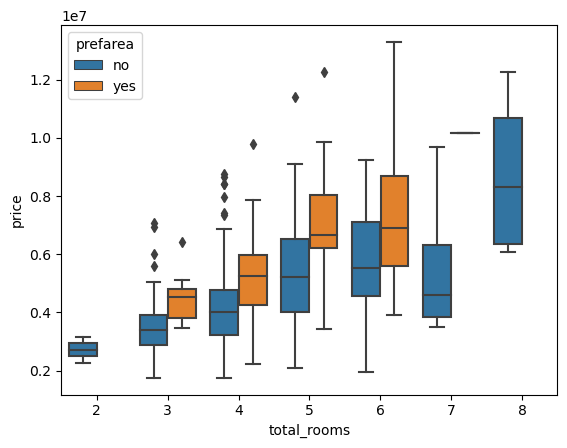

In [25]:
sns.boxplot(x="total_rooms", y="price" , data=df, hue="prefarea")

<Axes: xlabel='total_rooms', ylabel='price'>

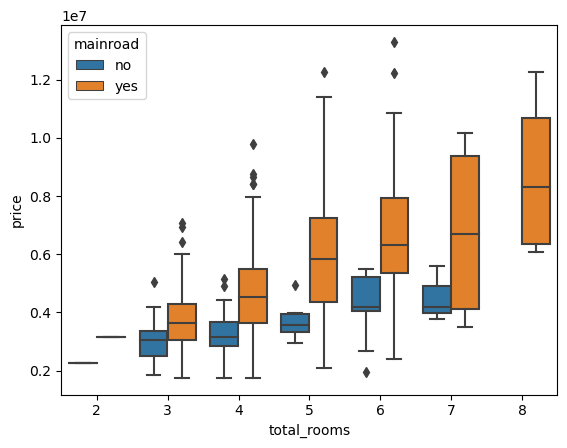

In [26]:
sns.boxplot(x="total_rooms", y="price" , data=df, hue="mainroad")

In [27]:
#sns.boxplot(x="area", y="price" , data=df, hue="mainroad")

<Axes: xlabel='total_rooms', ylabel='price'>

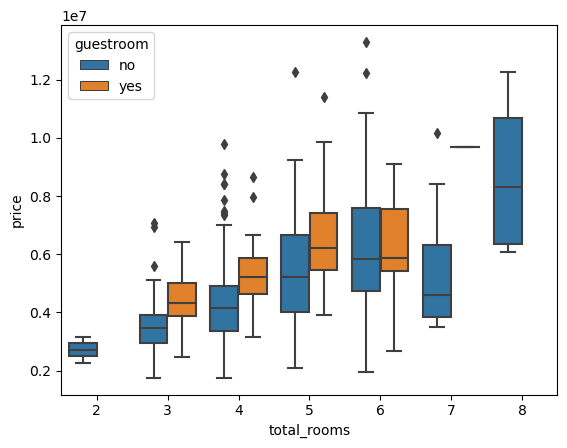

In [28]:
sns.boxplot(x="total_rooms" , y="price" , data=df , hue="guestroom")

<Axes: xlabel='total_rooms', ylabel='price'>

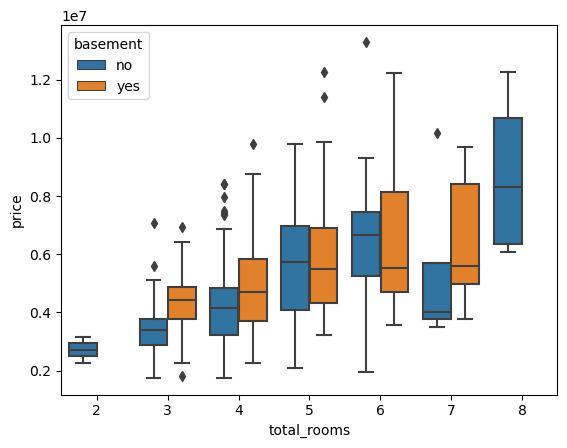

In [29]:
sns.boxplot(x="total_rooms" , y="price" , data=df, hue="basement")

<Axes: xlabel='total_rooms', ylabel='price'>

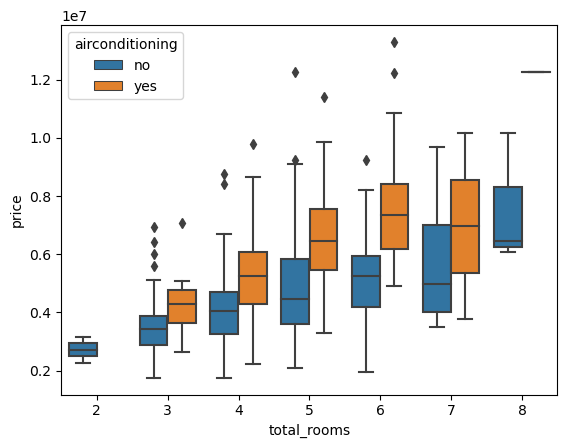

In [30]:
sns.boxplot(x="total_rooms" , y="price" , data=df, hue="airconditioning")

<Axes: xlabel='total_rooms', ylabel='price'>

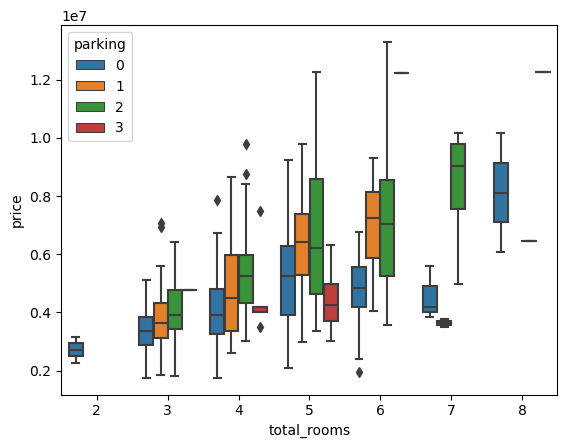

In [31]:
sns.boxplot(x="total_rooms" , y="price" , data=df, hue="parking")

# droping usless columns

In [32]:
df.drop(columns=["parking"] ,axis=1 , inplace=True)
df

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,prefarea,furnishingstatus,total_rooms
0,13300000,7420,4,2,yes,no,no,yes,yes,furnished,6
1,12250000,8960,4,4,yes,no,no,yes,no,furnished,8
2,12250000,9960,3,2,yes,no,yes,no,yes,semi-furnished,5
3,12215000,7500,4,2,yes,no,yes,yes,yes,furnished,6
4,11410000,7420,4,1,yes,yes,yes,yes,no,furnished,5
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,yes,no,yes,no,no,unfurnished,3
541,1767150,2400,3,1,no,no,no,no,no,semi-furnished,4
542,1750000,3620,2,1,yes,no,no,no,no,unfurnished,3
543,1750000,2910,3,1,no,no,no,no,no,furnished,4


<Axes: xlabel='total_rooms', ylabel='price'>

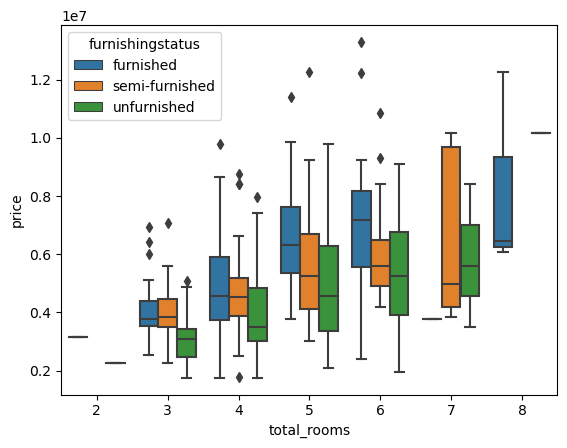

In [33]:
sns.boxplot(x="total_rooms" , y="price" , data=df, hue="furnishingstatus")

# Futuer ectraction

In [34]:
df['full_furnished'] = df[['airconditioning', 'furnishingstatus']].apply(lambda x: ' '.join(x), axis=1)
df

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,prefarea,furnishingstatus,total_rooms,full_furnished
0,13300000,7420,4,2,yes,no,no,yes,yes,furnished,6,yes furnished
1,12250000,8960,4,4,yes,no,no,yes,no,furnished,8,yes furnished
2,12250000,9960,3,2,yes,no,yes,no,yes,semi-furnished,5,no semi-furnished
3,12215000,7500,4,2,yes,no,yes,yes,yes,furnished,6,yes furnished
4,11410000,7420,4,1,yes,yes,yes,yes,no,furnished,5,yes furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,yes,no,yes,no,no,unfurnished,3,no unfurnished
541,1767150,2400,3,1,no,no,no,no,no,semi-furnished,4,no semi-furnished
542,1750000,3620,2,1,yes,no,no,no,no,unfurnished,3,no unfurnished
543,1750000,2910,3,1,no,no,no,no,no,furnished,4,no furnished


In [35]:
df['sub_rooms'] = df[['guestroom', 'basement']].apply(lambda x: ' '.join(x), axis=1)
df

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,prefarea,furnishingstatus,total_rooms,full_furnished,sub_rooms
0,13300000,7420,4,2,yes,no,no,yes,yes,furnished,6,yes furnished,no no
1,12250000,8960,4,4,yes,no,no,yes,no,furnished,8,yes furnished,no no
2,12250000,9960,3,2,yes,no,yes,no,yes,semi-furnished,5,no semi-furnished,no yes
3,12215000,7500,4,2,yes,no,yes,yes,yes,furnished,6,yes furnished,no yes
4,11410000,7420,4,1,yes,yes,yes,yes,no,furnished,5,yes furnished,yes yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,yes,no,yes,no,no,unfurnished,3,no unfurnished,no yes
541,1767150,2400,3,1,no,no,no,no,no,semi-furnished,4,no semi-furnished,no no
542,1750000,3620,2,1,yes,no,no,no,no,unfurnished,3,no unfurnished,no no
543,1750000,2910,3,1,no,no,no,no,no,furnished,4,no furnished,no no


<Axes: xlabel='total_rooms', ylabel='price'>

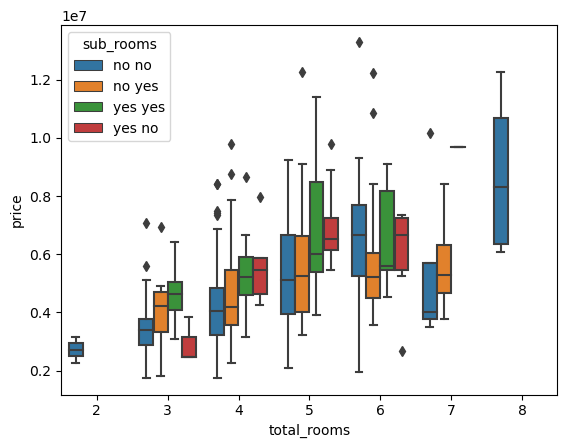

In [36]:
sns.boxplot(x="total_rooms" , y="price" , data=df, hue="sub_rooms")

# encoding data

In [37]:
df = pd.get_dummies(df , columns=["mainroad","guestroom","basement","airconditioning","prefarea","furnishingstatus","full_furnished","sub_rooms"])
df

,price,area,bedrooms,bathrooms,total_rooms,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,...,full_furnished_no furnished,full_furnished_no semi-furnished,full_furnished_no unfurnished,full_furnished_yes furnished,full_furnished_yes semi-furnished,full_furnished_yes unfurnished,sub_rooms_no no,sub_rooms_no yes,sub_rooms_yes no,sub_rooms_yes yes
0,13300000,7420,4,2,6,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
1,12250000,8960,4,4,8,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,12250000,9960,3,2,5,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,12215000,7500,4,2,6,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,11410000,7420,4,1,5,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,3,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
541,1767150,2400,3,1,4,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
542,1750000,3620,2,1,3,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
543,1750000,2910,3,1,4,1,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0


# droping usless columns

In [38]:
df.drop(columns=["sub_rooms_no yes","sub_rooms_yes no","full_furnished_no unfurnished","full_furnished_yes semi-furnished","full_furnished_yes unfurnished","sub_rooms_no no","full_furnished_no semi-furnished","full_furnished_no furnished"],axis=1 , inplace=True)

df

,price,area,bedrooms,bathrooms,total_rooms,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,full_furnished_yes furnished,sub_rooms_yes yes
0,13300000,7420,4,2,6,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0
1,12250000,8960,4,4,8,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0
2,12250000,9960,3,2,5,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0
3,12215000,7500,4,2,6,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0
4,11410000,7420,4,1,5,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,3,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0
541,1767150,2400,3,1,4,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
542,1750000,3620,2,1,3,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0
543,1750000,2910,3,1,4,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0


<Axes: >

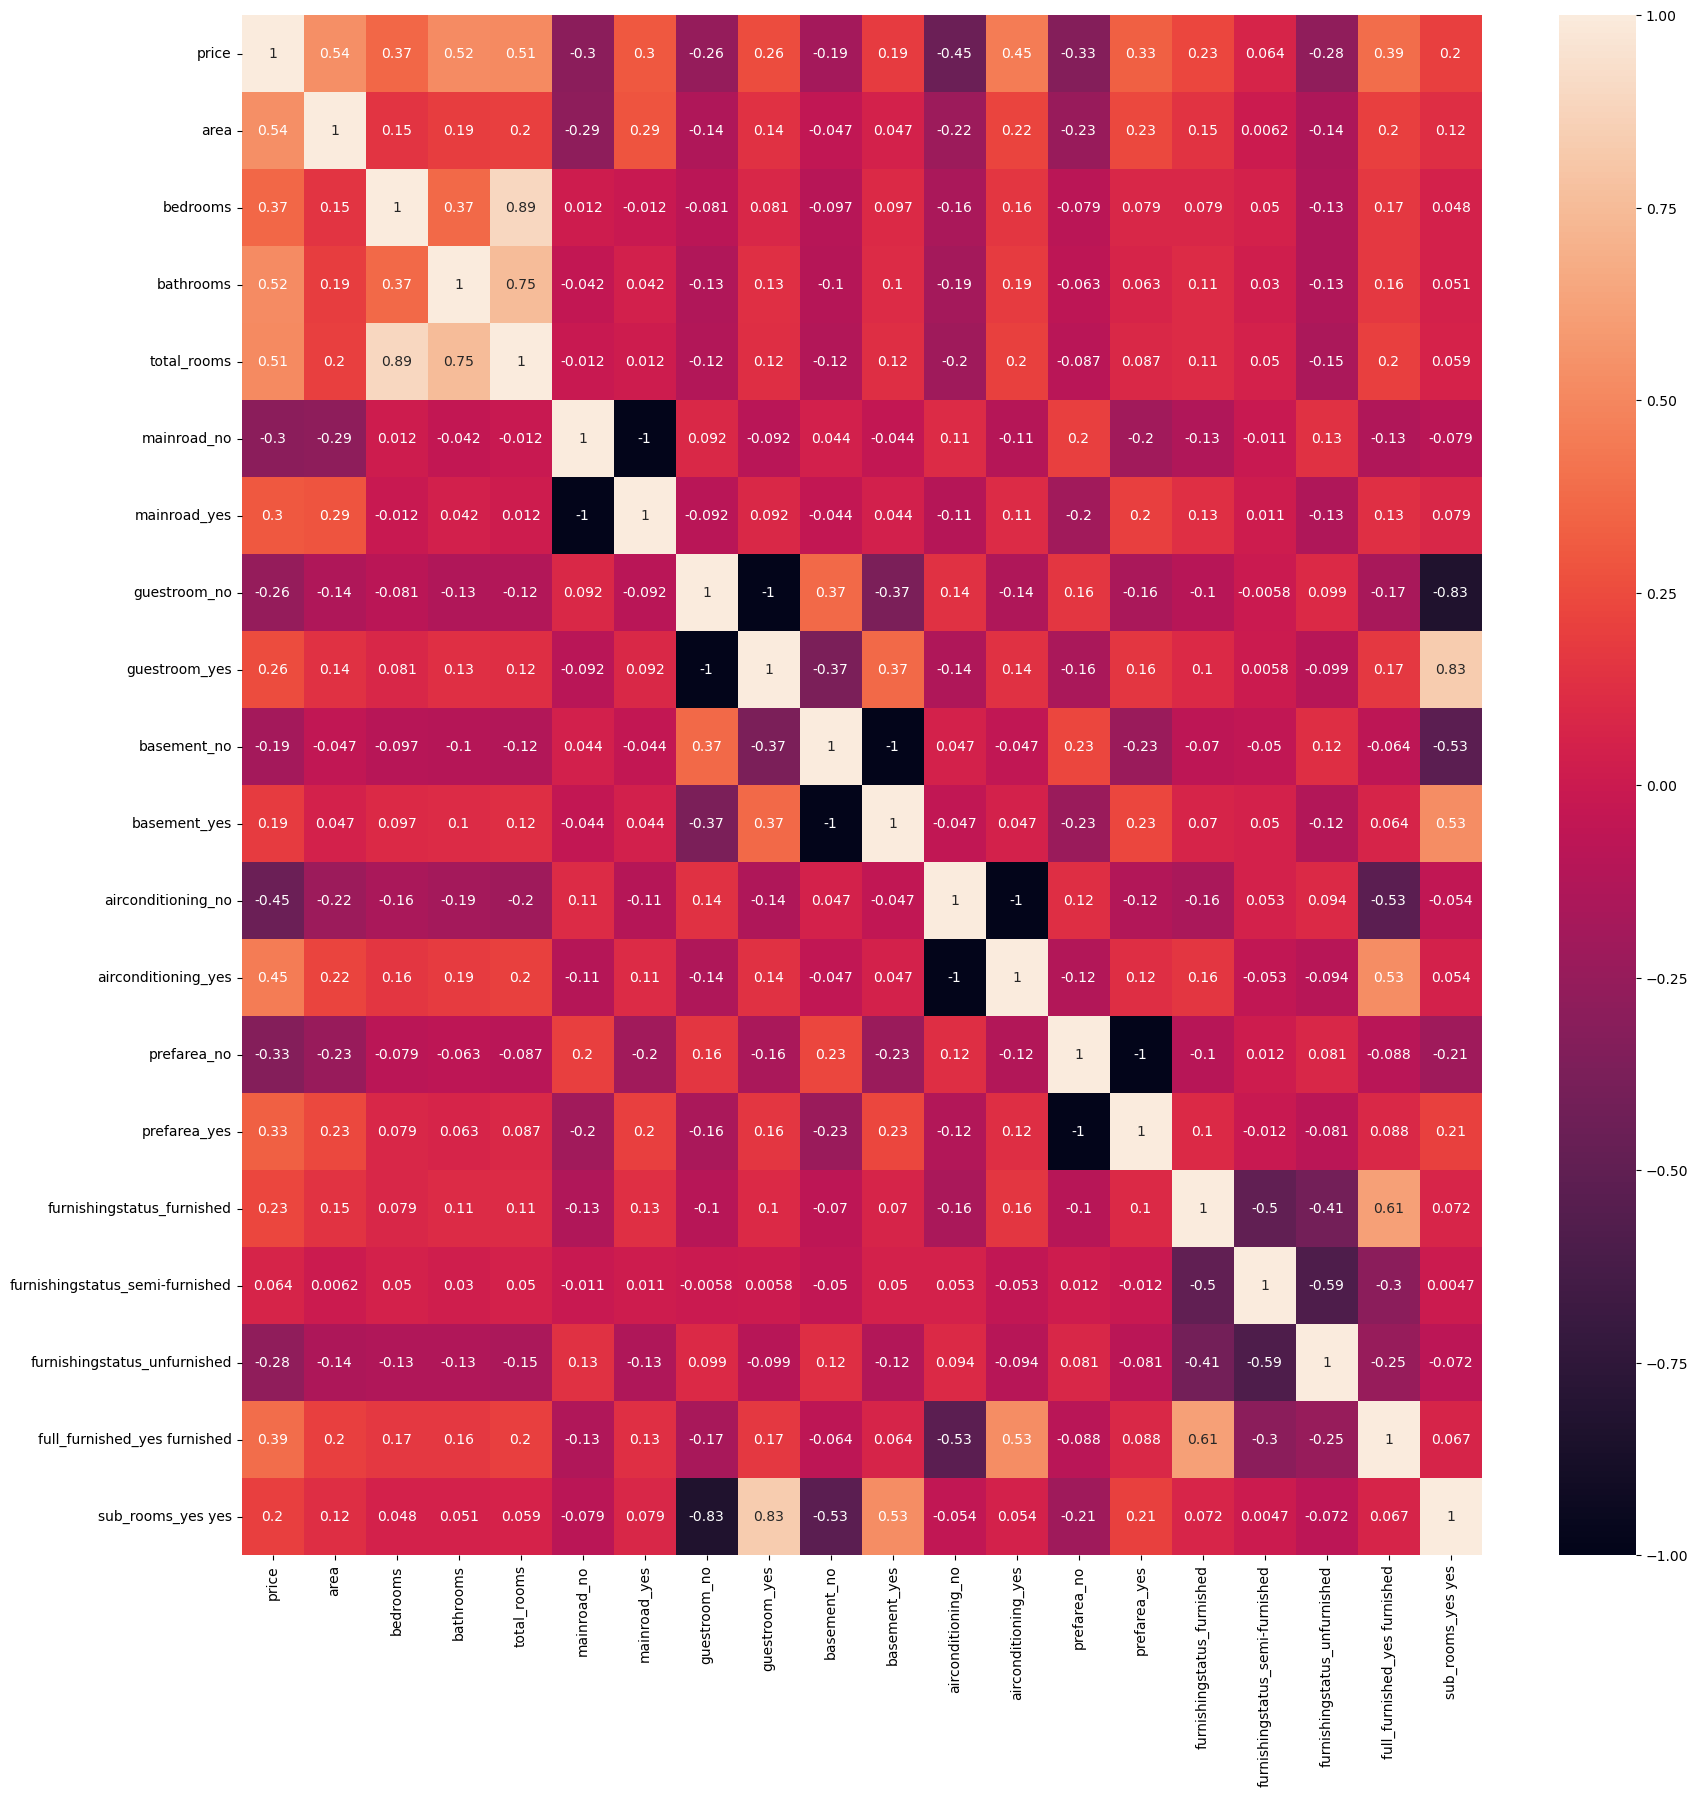

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() , annot=True)

<Axes: xlabel='price', ylabel='Density'>

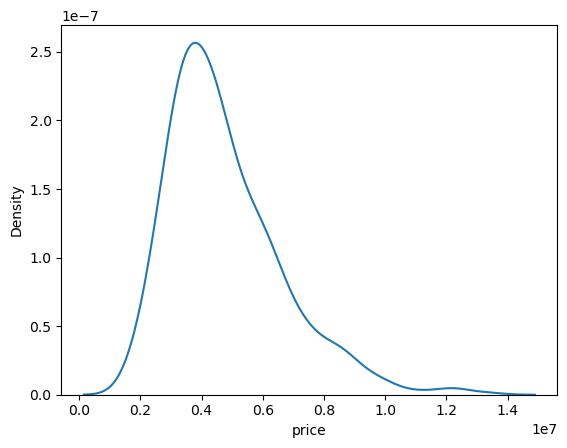

In [40]:
sns.kdeplot("price" , data=df)

In [41]:
df

,price,area,bedrooms,bathrooms,total_rooms,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,full_furnished_yes furnished,sub_rooms_yes yes
0,13300000,7420,4,2,6,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0
1,12250000,8960,4,4,8,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0
2,12250000,9960,3,2,5,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0
3,12215000,7500,4,2,6,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0
4,11410000,7420,4,1,5,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,3,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0
541,1767150,2400,3,1,4,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
542,1750000,3620,2,1,3,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0
543,1750000,2910,3,1,4,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0


In [42]:
numirc_cols = df.columns[:5]
df[numirc_cols]

,price,area,bedrooms,bathrooms,total_rooms
0,13300000,7420,4,2,6
1,12250000,8960,4,4,8
2,12250000,9960,3,2,5
3,12215000,7500,4,2,6
4,11410000,7420,4,1,5
...,...,...,...,...,...
540,1820000,3000,2,1,3
541,1767150,2400,3,1,4
542,1750000,3620,2,1,3
543,1750000,2910,3,1,4


# check outliers

In [43]:
for i in df[numirc_cols].columns:
    q1 = df[i].quantile(.25)
    q3 = df[i].quantile(.75)
    IQR = q3 - q1
    upper_p = q3 + 1.5 * IQR
    lower_p = q1 - 1.5 * IQR
    
    upr_outl = df[df[i] > upper_p][i].values
    lor_outl = df[df[i] < lower_p][i].values
    
    df[i] = df[i].replace(lor_outl , lower_p)
    df[i] = df[i].replace(upr_outl , upper_p)
    print(df[i].min() ,"  ",  df[i].max())
    print()

1750000    9205000

1650    10500

1.0    4.5

1.0    3.5

2.5    6.5



In [44]:
df.describe()

,price,area,bedrooms,bathrooms,total_rooms,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,full_furnished_yes furnished,sub_rooms_yes yes
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.727388e+06,5102.249541,2.950459,1.285321,4.233945,0.141284,0.858716,0.822018,0.177982,0.649541,0.350459,0.684404,0.315596,0.765138,0.234862,0.256881,0.416514,0.326606,0.113761,0.130275
std,1.745227e+06,2005.804353,0.697504,0.497942,0.979498,0.348635,0.348635,0.382849,0.382849,0.477552,0.477552,0.465180,0.465180,0.424302,0.424302,0.437314,0.493434,0.469402,0.317813,0.336915
min,1.750000e+06,1650.000000,1.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,9.205000e+06,10500.000000,4.500000,3.500000,6.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='price'>

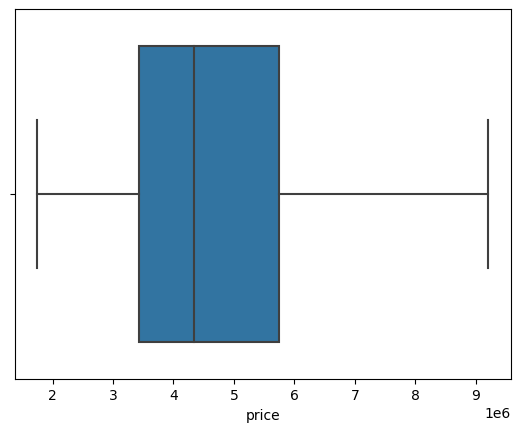

In [45]:
sns.boxplot(x="price" , data=df)

<Axes: xlabel='total_rooms', ylabel='price'>

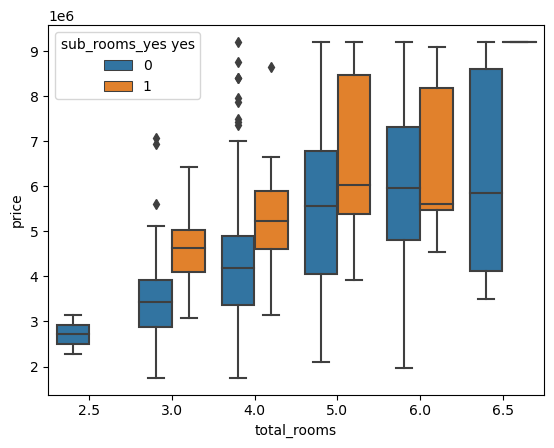

In [47]:
sns.boxplot(x="total_rooms" , y="price" , data=df, hue="sub_rooms_yes yes")

<Axes: xlabel='total_rooms', ylabel='price'>

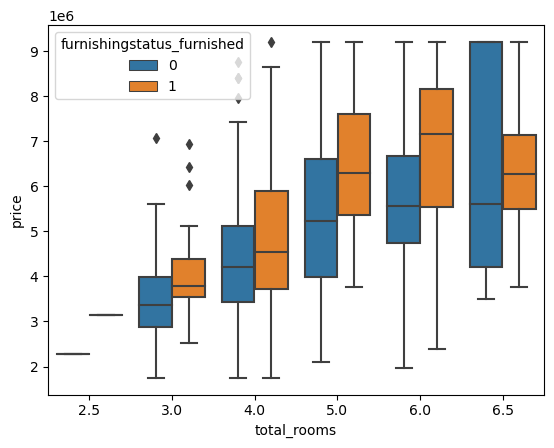

In [48]:
sns.boxplot(x="total_rooms" , y="price" , data=df, hue="furnishingstatus_furnished")

<Axes: xlabel='bedrooms', ylabel='price'>

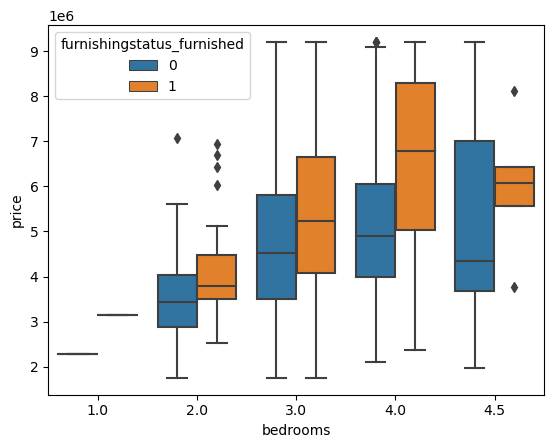

In [49]:
sns.boxplot(x="bedrooms" , y="price" , data=df, hue="furnishingstatus_furnished")

# Scaling data

In [50]:
df[numirc_cols]

,price,area,bedrooms,bathrooms,total_rooms
0,9205000,7420,4.0,2.0,6.0
1,9205000,8960,4.0,3.5,6.5
2,9205000,9960,3.0,2.0,5.0
3,9205000,7500,4.0,2.0,6.0
4,9205000,7420,4.0,1.0,5.0
...,...,...,...,...,...
540,1820000,3000,2.0,1.0,3.0
541,1767150,2400,3.0,1.0,4.0
542,1750000,3620,2.0,1.0,3.0
543,1750000,2910,3.0,1.0,4.0


In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numirc_cols] = scaler.fit_transform(df[numirc_cols])


In [52]:
df

,price,area,bedrooms,bathrooms,total_rooms,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,full_furnished_yes furnished,sub_rooms_yes yes
0,1.00000,0.651977,0.857143,0.4,0.875,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0
1,1.00000,0.825989,0.857143,1.0,1.000,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0
2,1.00000,0.938983,0.571429,0.4,0.625,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0
3,1.00000,0.661017,0.857143,0.4,0.875,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0
4,1.00000,0.651977,0.857143,0.0,0.625,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.00939,0.152542,0.285714,0.0,0.125,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0
541,0.00230,0.084746,0.571429,0.0,0.375,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
542,0.00000,0.222599,0.285714,0.0,0.125,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0
543,0.00000,0.142373,0.571429,0.0,0.375,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0
